In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,confusion_matrix,classification_report,roc_auc_score

In [ ]:
dados = pd.read_csv('/content/BankChurners.csv')

In [ ]:
dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
dados = dados.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "bayes_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "bayes_2"})

In [ ]:
cat_columns=['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [ ]:
num_columns = dados.drop(columns = cat_columns).columns

In [ ]:
dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,bayes_1,bayes_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
dados.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,bayes_1,bayes_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [ ]:
dados.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
dados.duplicated().sum()

0

In [ ]:
dados['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
dados['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [ ]:
dados = dados.replace('Unknown',None)

In [ ]:
dados.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0


In [ ]:
dados.dropna(inplace = True)

In [ ]:
dados['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [ ]:
dados['Attrition_Flag'] = dados['Attrition_Flag'].replace('Existing Customer',0)
dados['Attrition_Flag'] = dados['Attrition_Flag'].replace('Attrited Customer',1)

(array([  19., 1525.,    0., 2320.,    0., 2724.,  289.,    0.,  129.,
          75.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

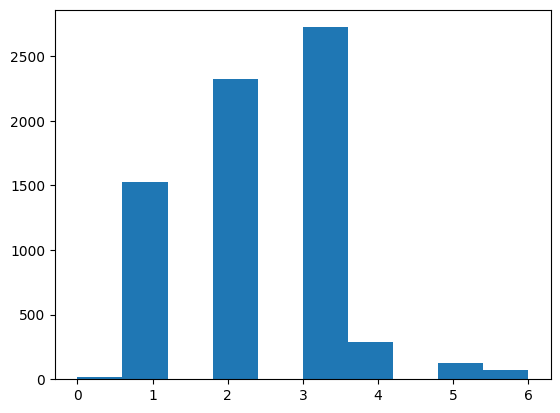

In [ ]:
plt.hist(dados['Months_Inactive_12_mon'])

(array([ 288., 1029.,    0., 2271.,    0., 2354.,  978.,    0.,  131.,
          30.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

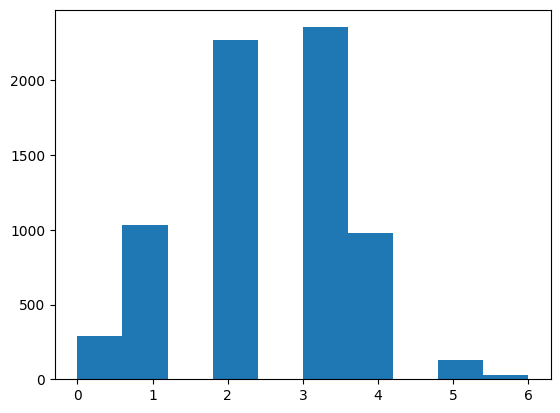

In [ ]:
plt.hist(dados['Contacts_Count_12_mon'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789a9510ec50>,
 'caps': [<matplotlib.lines.Line2D at 0x789a9510f190>,
 'boxes': [<matplotlib.lines.Line2D at 0x789a9510e9b0>,
 'medians': [<matplotlib.lines.Line2D at 0x789a9510f6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x789a9510f970>,
 'means': []}

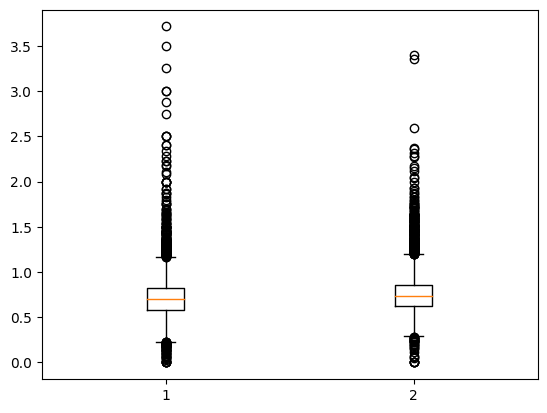

In [ ]:
plt.boxplot(dados[['Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1']])

{'whiskers': [<matplotlib.lines.Line2D at 0x789a94fc8580>,
 'caps': [<matplotlib.lines.Line2D at 0x789a94fc8ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789a94fc82e0>],
 'medians': [<matplotlib.lines.Line2D at 0x789a94fc9000>],
 'fliers': [<matplotlib.lines.Line2D at 0x789a94fc92a0>],
 'means': []}

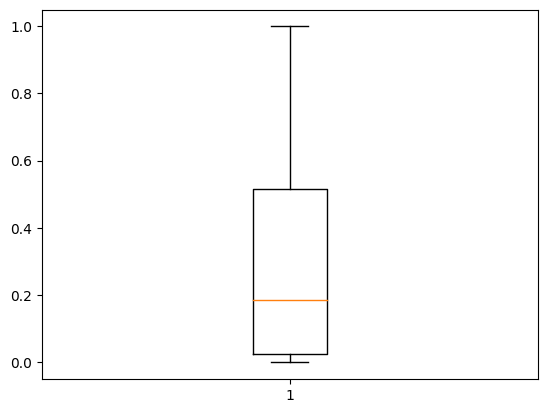

In [ ]:
plt.boxplot(dados['Avg_Utilization_Ratio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789a95017190>,
 'caps': [<matplotlib.lines.Line2D at 0x789a950176d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789a95016ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x789a95017c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x789a95017eb0>],
 'means': []}

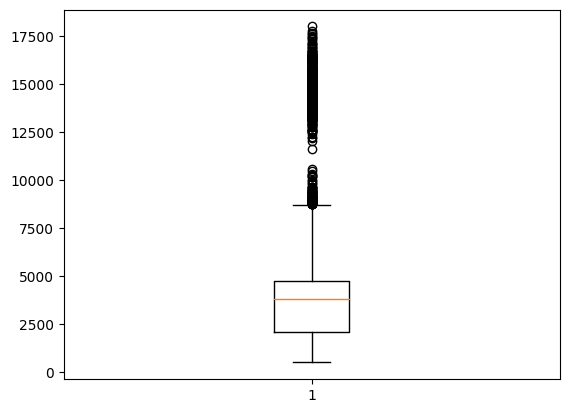

In [ ]:
plt.boxplot(dados['Total_Trans_Amt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789a9508f130>,
 'caps': [<matplotlib.lines.Line2D at 0x789a9508f670>,
 'boxes': [<matplotlib.lines.Line2D at 0x789a9508ee90>],
 'medians': [<matplotlib.lines.Line2D at 0x789a9508fbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789a9508fdc0>],
 'means': []}

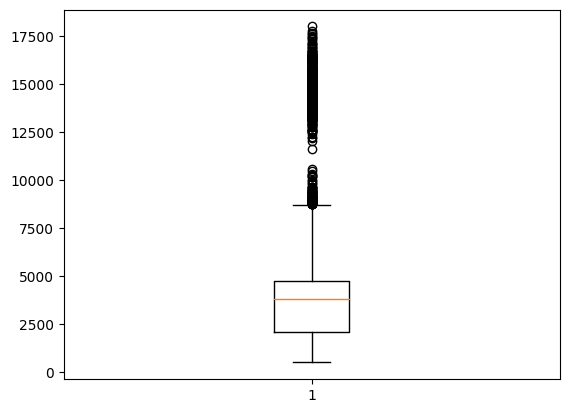

In [ ]:
plt.boxplot(dados['Total_Trans_Amt'])

(array([6598.,    0.,    0.,   81.,    0.,    0.,  391.,    0.,    0.,
          11.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

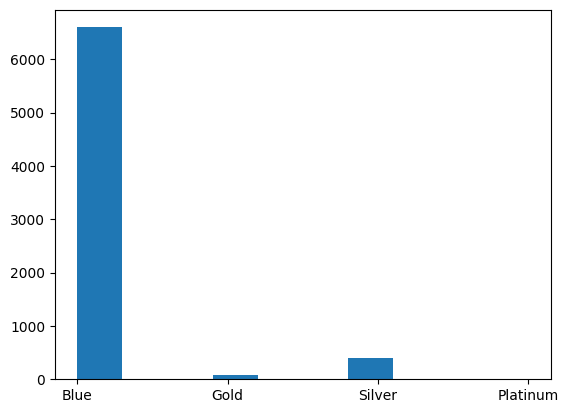

In [ ]:
plt.hist(x = dados['Card_Category'])

(array([5968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1113.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

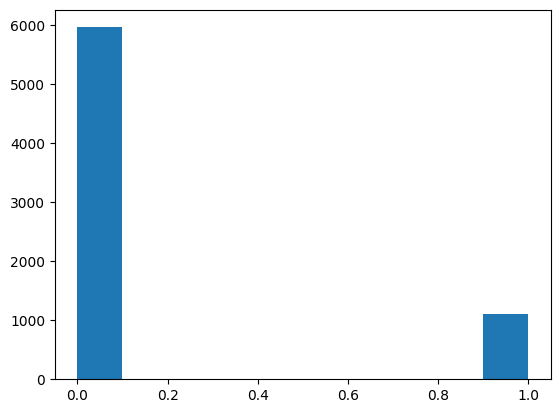

In [ ]:
plt.hist(dados['Attrition_Flag'])

<Axes: xlabel='Gender'>

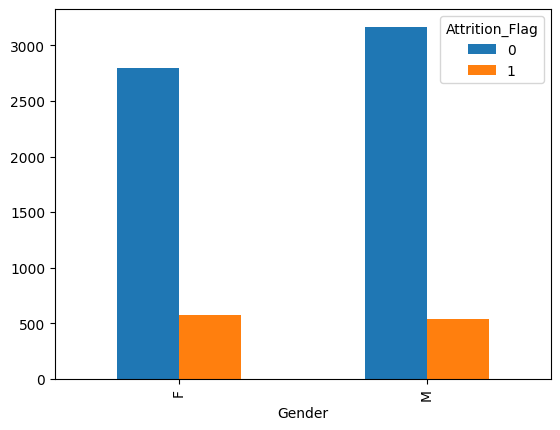

In [ ]:
tabela_genero = dados[['Gender','Attrition_Flag','CLIENTNUM']].groupby(['Gender','Attrition_Flag']).count().reset_index()
tabela_genero = tabela_genero.pivot(index='Gender', columns='Attrition_Flag', values='CLIENTNUM')
tabela_genero.plot(kind='bar')

<Axes: xlabel='Education_Level'>

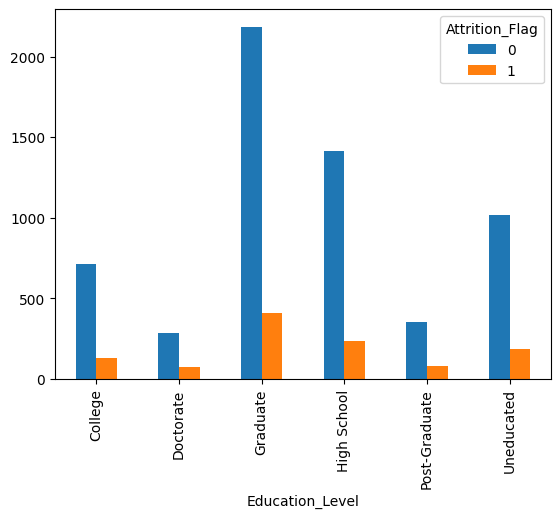

In [ ]:
tabela_Edu = dados[['Education_Level','Attrition_Flag','CLIENTNUM']].groupby(['Education_Level','Attrition_Flag']).count().reset_index()
tabela_Edu = tabela_Edu.pivot(index='Education_Level', columns='Attrition_Flag', values='CLIENTNUM')
tabela_Edu.plot(kind='bar')

<Axes: xlabel='Marital_Status'>

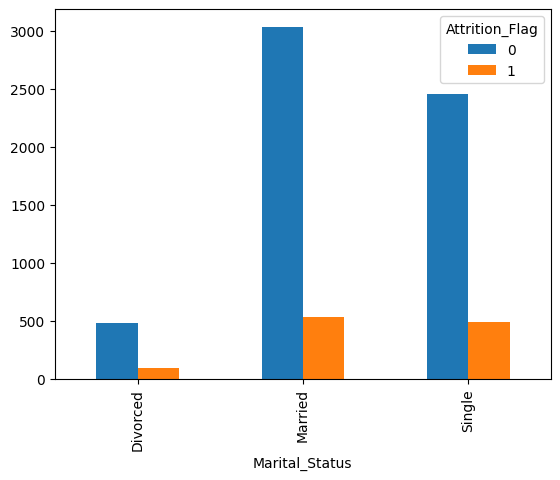

In [ ]:
tabela_Est_Civ = dados[['Marital_Status','Attrition_Flag','CLIENTNUM']].groupby(['Marital_Status','Attrition_Flag']).count().reset_index()
tabela_Est_Civ = tabela_Est_Civ.pivot(index='Marital_Status', columns='Attrition_Flag', values='CLIENTNUM')
tabela_Est_Civ.plot(kind='bar')

<Axes: xlabel='Income_Category'>

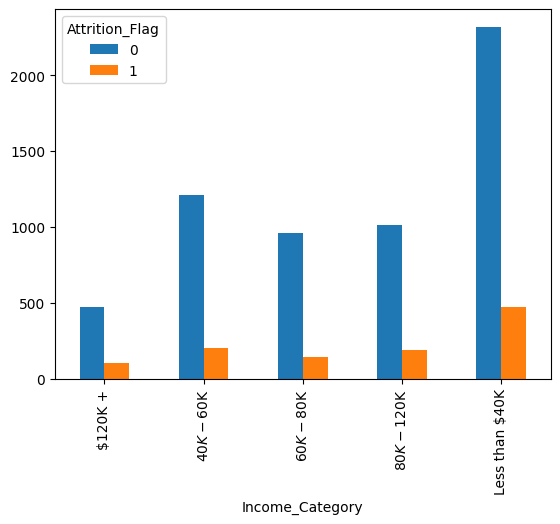

In [ ]:
tabela_Renda = dados[['Income_Category','Attrition_Flag','CLIENTNUM']].groupby(['Income_Category','Attrition_Flag']).count().reset_index()
tabela_Renda = tabela_Renda.pivot(index='Income_Category', columns='Attrition_Flag', values='CLIENTNUM')
tabela_Renda.plot(kind='bar')

<Axes: xlabel='Card_Category'>

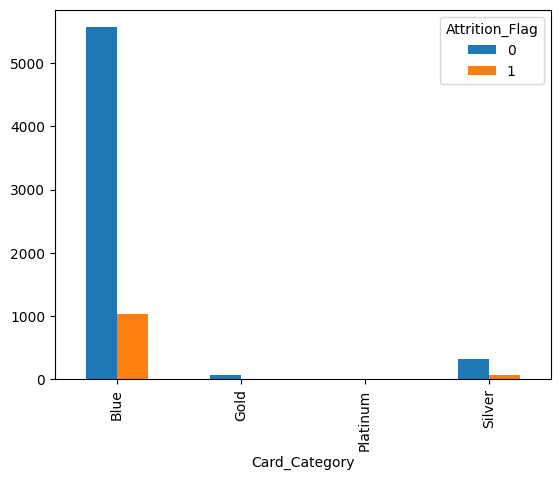

In [ ]:
tabela_Cartao = dados[['Card_Category','Attrition_Flag','CLIENTNUM']].groupby(['Card_Category','Attrition_Flag']).count().reset_index()
tabela_Cartao = tabela_Cartao.pivot(index='Card_Category', columns='Attrition_Flag', values='CLIENTNUM')
tabela_Cartao.plot(kind='bar')

<Axes: >

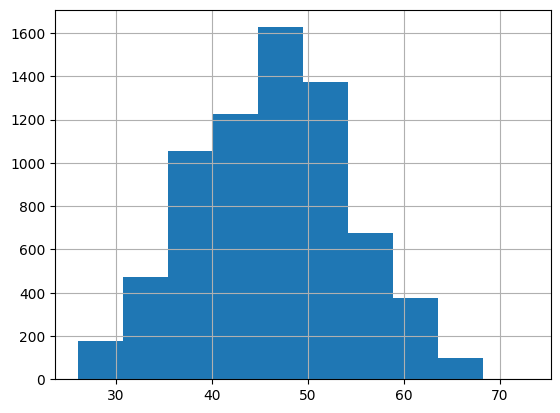

In [ ]:
dados['Customer_Age'].hist()

In [ ]:
dados[num_columns].drop('CLIENTNUM',axis=1).groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,bayes_1,bayes_2
Attrition_Flag,,,,,,,,,,,,,,,,
0,46.317359,2.331434,35.949397,3.916555,2.276977,2.361930,8555.099196,1260.589980,7294.509216,0.773370,4634.505529,68.176441,0.740415,0.304458,0.000185,0.999815
1,46.510332,2.371968,36.152740,3.298293,2.694519,2.950584,8158.579964,668.353998,7490.225966,0.692021,3106.296496,44.807727,0.556502,0.163571,0.994873,0.005127


In [ ]:
dados[['Total_Trans_Ct','Total_Revolving_Bal','Attrition_Flag']].groupby('Attrition_Flag').mean()

,Total_Trans_Ct,Total_Revolving_Bal
Attrition_Flag,,
0,68.176441,1260.589980
1,44.807727,668.353998


In [ ]:
dados[num_columns].drop(columns = ['CLIENTNUM']).corr()['Attrition_Flag']

,Attrition_Flag
Attrition_Flag,1.000000
Customer_Age,0.008735
Dependent_count,0.011423
Months_on_book,0.009249
Total_Relationship_Count,-0.145713
Months_Inactive_12_mon,0.152732
Contacts_Count_12_mon,0.193923
Credit_Limit,-0.015815
Total_Revolving_Bal,-0.265380
Avg_Open_To_Buy,0.007802


In [ ]:
dados[num_columns].drop(columns='CLIENTNUM').corr()['Total_Revolving_Bal']

,Total_Revolving_Bal
Attrition_Flag,-0.265380
Customer_Age,0.016325
Dependent_count,-0.003832
Months_on_book,0.007884
Total_Relationship_Count,0.014313
Months_Inactive_12_mon,-0.039889
Contacts_Count_12_mon,-0.048690
Credit_Limit,0.038170
Total_Revolving_Bal,1.000000
Avg_Open_To_Buy,-0.050812


In [ ]:
dados[num_columns].drop(columns='CLIENTNUM').corr()['Total_Trans_Ct']

,Total_Trans_Ct
Attrition_Flag,-0.357261
Customer_Age,-0.069883
Dependent_count,0.057056
Months_on_book,-0.050445
Total_Relationship_Count,-0.246749
Months_Inactive_12_mon,-0.048169
Contacts_Count_12_mon,-0.155612
Credit_Limit,0.080834
Total_Revolving_Bal,0.052091
Avg_Open_To_Buy,0.076154


<Axes: >

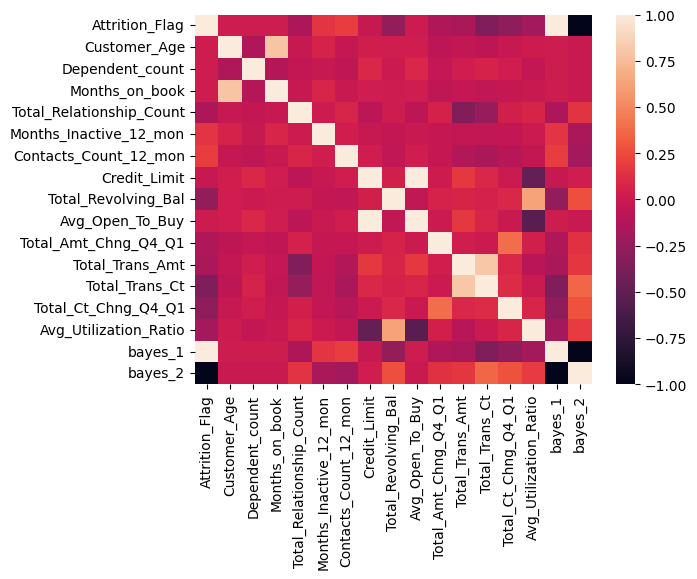

In [ ]:
sns.heatmap(dados[num_columns].drop(columns=['CLIENTNUM']).corr())

As variaveis numéricas escolhidas para entrar no modelo são apenas as chamadas de 'Total_Revolving_Bal','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1' que possuem uma correlção relevante com a variável alvo. as variáveis chamadas de bayes_1 e bayes-2 pois possuem uma correlação forte demais com a variável alvo

In [ ]:
Le = LabelEncoder()

In [ ]:
dados['Card_Category'] = Le.fit_transform(dados['Card_Category'])
dados['Education_Level'] = Le.fit_transform(dados['Education_Level'])
dados['Income_Category'] = Le.fit_transform(dados['Income_Category'])
dados['Gender'] = Le.fit_transform(dados['Gender'])
dados['Marital_Status'] = Le.fit_transform(dados['Marital_Status'])

In [ ]:
dados = pd.get_dummies(dados)

In [ ]:
x = dados[cat_columns]
y = dados['Attrition_Flag']

In [ ]:
chi_score = chi2(x,y)

In [ ]:
chi_score

(array([4.21929617, 0.40943776, 0.5421522 , 1.5839777 , 0.32718023]),
 array([0.03996674, 0.52225501, 0.46154215, 0.20818867, 0.56732421]))

In [ ]:
chi_df = pd.Series(chi_score[0],index = x.columns)

In [ ]:
chi_df

,0
Gender,4.219296
Education_Level,0.409438
Marital_Status,0.542152
Income_Category,1.583978
Card_Category,0.327180


In [ ]:
p_value_df = pd.Series(chi_score[1],index = x.columns)
p_value_df

,0
Gender,0.039967
Education_Level,0.522255
Marital_Status,0.461542
Income_Category,0.208189
Card_Category,0.567324


Variáveis categoricas Gender e Income_Category selecionadas

In [ ]:
#x = dados[['Gender','Income_Category','bayes_1','bayes_2','Total_Trans_Ct']]
x = dados[['Gender','Income_Category','Total_Trans_Ct','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1']]
Y = dados['Attrition_Flag']

In [ ]:
Rf = RandomForestClassifier()
Gf = GradientBoostingClassifier()
Lr = LogisticRegression()
Ad = AdaBoostClassifier()

In [ ]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state = 66)

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=66)
x_smote,Y_smote = smote.fit_resample(x_train,Y_train)

In [ ]:
Rf.fit(x_smote,Y_smote)
Gf.fit(x_smote,Y_smote)
Lr.fit(x_smote,Y_smote)
Ad.fit(x_smote,Y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AdaBoostClassifier()

In [ ]:
Y_pred_Rf = Rf.predict(x_test)
Y_pred_Gf = Gf.predict(x_test)
Y_pred_Lr = Lr.predict(x_test)
Y_pred_Ad = Ad.predict(x_test)

In [ ]:
confusion_matrix(Y_train,Rf.predict(x_train))

array([[4755,   18],
       [  13,  878]])

In [ ]:
confusion_matrix(Y_test,Rf.predict(x_test))

array([[1065,  130],
       [  78,  144]])

In [ ]:
confusion_matrix(Y_train,Gf.predict(x_train))

array([[4252,  521],
       [ 162,  729]])

In [ ]:
confusion_matrix(Y_test,Gf.predict(x_test))

array([[1041,  154],
       [  49,  173]])

In [ ]:
confusion_matrix(Y_test,Lr.predict(x_test))

array([[902, 293],
       [ 66, 156]])

In [ ]:
confusion_matrix(Y_train,Lr.predict(x_train))

array([[3760, 1013],
       [ 225,  666]])

In [ ]:
acc_Ad = accuracy_score(Y_test,Y_pred_Ad)
acc_Rf = accuracy_score(Y_test,Y_pred_Rf)
acc_Lr = accuracy_score(Y_test,Y_pred_Lr)
acc_Gf = accuracy_score(Y_test,Y_pred_Gf)
f1_Ad = f1_score(Y_test,Y_pred_Ad)
f1_Rf = f1_score(Y_test,Y_pred_Rf)
f1_Lr = f1_score(Y_test,Y_pred_Lr)
f1_Gf = f1_score(Y_test,Y_pred_Gf)
recall_Ad = recall_score(Y_test,Y_pred_Ad)
recall_Rf = recall_score(Y_test,Y_pred_Rf)
recall_Lr = recall_score(Y_test,Y_pred_Lr)
recall_Gf = recall_score(Y_test,Y_pred_Gf)
precision_Ad = precision_score(Y_test,Y_pred_Ad)
precision_Rf = precision_score(Y_test,Y_pred_Rf)
precision_Lr = precision_score(Y_test,Y_pred_Lr)
precision_Gf = precision_score(Y_test,Y_pred_Gf)

In [ ]:
acc_Ad_train = accuracy_score(Y_train,Ad.predict(x_train))
acc_Rf_train = accuracy_score(Y_train,Rf.predict(x_train))
acc_Lr_train = accuracy_score(Y_train,Lr.predict(x_train))
acc_Gf_train = accuracy_score(Y_train,Gf.predict(x_train))
f1_Ad_train = f1_score(Y_train,Ad.predict(x_train))
f1_Rf_train = f1_score(Y_train,Rf.predict(x_train))
f1_Lr_train = f1_score(Y_train,Lr.predict(x_train))
f1_Gf_train = f1_score(Y_train,Gf.predict(x_train))
recall_Ad_train = recall_score(Y_train,Ad.predict(x_train))
recall_Rf_train = recall_score(Y_train,Rf.predict(x_train))
recall_Lr_train = recall_score(Y_train,Lr.predict(x_train))
recall_Gf_train = recall_score(Y_train,Lr.predict(x_train))
precision_Ad_train = precision_score(Y_train,Ad.predict(x_train))
precision_Rf_train = precision_score(Y_train,Rf.predict(x_train))
precision_Lr_train = precision_score(Y_train,Lr.predict(x_train))
precision_Gf_train = precision_score(Y_train,Gf.predict(x_train))

In [ ]:
print('Accuracy Ada_class_train',acc_Ad_train)
print('Accuracy Ada_class_test',acc_Ad)
print('Accuracy Random_Forest_train',acc_Rf_train)
print('Accuracy Random_Forest_test',acc_Rf)
print('Accuracy Logistic_Regression_train',acc_Lr_train)
print('Accuracy Logistic_Regression_test',acc_Lr)
print('Accuracy Gradient_Boosting_train',acc_Gf_train)
print('Accuracy Gradient_Boosting_test',acc_Gf)
print('F1_score Ada_class_train',f1_Ad_train)
print('F1_score Ada_class_test',f1_Ad)
print('F1_score Random_Forest_train',f1_Rf_train)
print('F1_score Random_Forest_test',f1_Rf)
print('F1_score Logistic_Regression_train',f1_Lr_train)
print('F1_score Logistic_Regression_test',f1_Lr)
print('F1_score Gradient_Boosting_train',f1_Gf_train)
print('F1_score Gradient_Boosting_test',f1_Gf)
print('Recall Ada_class_train',recall_Ad_train)
print('Recall Ada_class_test',recall_Ad)
print('Recall Random_Forest_train',recall_Rf_train)
print('Recall Random_Forest_test',recall_Rf)
print('Recall Logistic_Regression_train',recall_Lr_train)
print('Recall Logistic_Regression_test',recall_Lr)
print('Recall Gradient_Boosting_train',recall_Gf_train)
print('Recall Gradient_Boosting_test',recall_Gf)
print('Precision Ada_class_train',precision_Ad_train)
print('Precision Ada_class_test',precision_Ad)
print('Precision Random_Forest_train',precision_Rf_train)
print('Precision Random_Forest_test',precision_Rf)
print('Precision Logistic_Regression_train',precision_Lr_train)
print('Precision Logistic_Regression_test',precision_Lr)
print('Precision Gradient_Boosting_train',precision_Gf_train)
print('Precision Gradient_Boosting_test',precision_Gf)

Accuracy Ada_class_train 0.8513418079096046
Accuracy Ada_class_test 0.8412138320395202
Accuracy Random_Forest_train 0.994526836158192
Accuracy Random_Forest_test 0.8532110091743119
Accuracy Logistic_Regression_train 0.7814265536723164
Accuracy Logistic_Regression_test 0.7466478475652788
Accuracy Gradient_Boosting_train 0.8794138418079096
Accuracy Gradient_Boosting_test 0.8567395906845449
F1_score Ada_class_train 0.6230975828111012
F1_score Ada_class_test 0.6045694200351494
F1_score Random_Forest_train 0.982652490207051
F1_score Random_Forest_test 0.5806451612903226
F1_score Logistic_Regression_train 0.5182879377431907
F1_score Logistic_Regression_test 0.46497764530551416
F1_score Gradient_Boosting_train 0.6809901914992995
F1_score Gradient_Boosting_test 0.6302367941712205
Recall Ada_class_train 0.7811447811447811
Recall Ada_class_test 0.7747747747747747
Recall Random_Forest_train 0.9854096520763187
Recall Random_Forest_test 0.6486486486486487
Recall Logistic_Regression_train 0.74747474

GradientBoostingClassifier foi escolhido para ser otimizado pois possue as melhores metricas dentro dos modelos avaliados

In [ ]:
params = {
    'learning_rate' : [0.05,0.1,0.2,0.25],
    'n_estimators' : [100,150,200]
}

In [ ]:
Gs = GridSearchCV(estimator=Gf,param_grid=params,cv=5,n_jobs=-1,scoring = 'accuracy')

In [ ]:
Gs.fit(x_smote,Y_smote)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.4],
                         'n_estimators': [100, 200, 400]},
             scoring='accuracy')

In [ ]:
Gs.best_params_

{'learning_rate': 0.4, 'n_estimators': 400}

In [ ]:
Gf_bossted = GradientBoostingClassifier(learning_rate = 0.2,n_estimators = 200)

In [ ]:
Gf_bossted.fit(x_smote,Y_smote)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=400)

In [ ]:
Y_pred_Gf_bossted_train = Gf_bossted.predict(x_train)
Y_pred_Gf_bossted_test = Gf_bossted.predict(x_test)

In [ ]:
acc_Gf_bossted_train = accuracy_score(Y_train,Y_pred_Gf_bossted_train)
acc_Gf_bossted_test = accuracy_score(Y_test,Y_pred_Gf_bossted_test)
f1_Gf_bossted_train = f1_score(Y_train,Y_pred_Gf_bossted_train)
f1_Gf_bossted_test = f1_score(Y_test,Y_pred_Gf_bossted_test)
recall_Gf_bossted_train = recall_score(Y_train,Y_pred_Gf_bossted_train)
recall_Gf_bossted_test = recall_score(Y_test,Y_pred_Gf_bossted_test)
precision_Gf_bossted_train = precision_score(Y_train,Y_pred_Gf_bossted_train)
precision_Gf_bossted_test = precision_score(Y_test,Y_pred_Gf_bossted_test)

In [ ]:
print('Accuracy Gradient_Boosting_train',acc_Gf_bossted_train)
print('Accuracy Gradient_Boosting_test',acc_Gf_bossted_test)
print('F1_score Gradient_Boosting_train',f1_Gf_bossted_train)
print('F1_score Gradient_Boosting_test',f1_Gf_bossted_test)
print('Recall Gradient_Boosting_train',recall_Gf_bossted_train)
print('Recall Gradient_Boosting_test',recall_Gf_bossted_test)
print('Precision Gradient_Boosting_train',precision_Gf_bossted_train)
print('Precision Gradient_Boosting_test',precision_Gf_bossted_test)

Accuracy Gradient_Boosting_train 0.9586864406779662
Accuracy Gradient_Boosting_test 0.858151023288638
F1_score Gradient_Boosting_train 0.8737864077669902
F1_score Gradient_Boosting_test 0.6066536203522505
Recall Gradient_Boosting_train 0.9090909090909091
Recall Gradient_Boosting_test 0.6981981981981982
Precision Gradient_Boosting_train 0.8411214953271028
Precision Gradient_Boosting_test 0.5363321799307958


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score,RocCurveDisplay

roc_score_train 0.9385177989829153
roc_score,test 0.7930321534924045
roc_curve_train


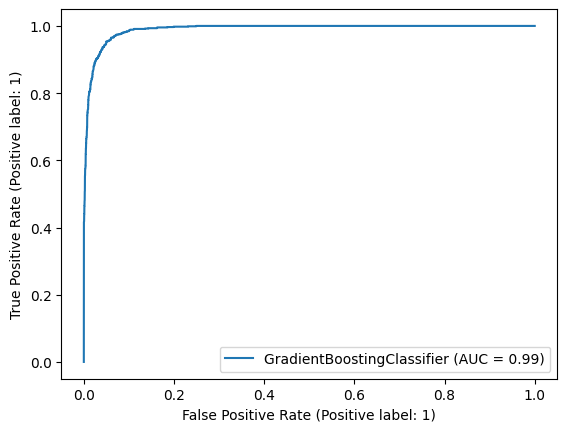

In [ ]:
print('roc_score_train',roc_auc_score(Y_train,Gf_bossted.predict(x_train)))
print('roc_score,test',roc_auc_score(Y_test,Gf_bossted.predict(x_test)))
print('roc_curve_train')
RocCurveDisplay.from_estimator(Gf_bossted,x_train,Y_train)

roc_curve_test


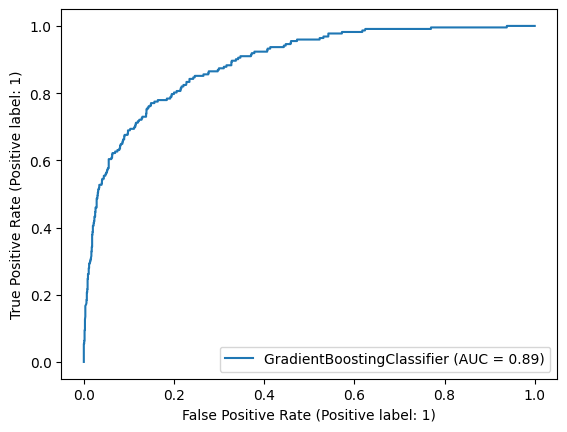

In [ ]:
print('roc_curve_test')
RocCurveDisplay.from_estimator(Gf_bossted,x_test,Y_test)